In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
Data = pd.read_csv(r"C:\Users\wind xebec\Downloads\Ecommerce_Sales_Data_2024_2025.csv")

In [5]:
Data.head(10)

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.60,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.00,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.20,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.00,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.30,9050.04,Debit Card
5,10006,2025-04-06,Vardaniya Jayaraman,West,Pune,Furniture,Chair,Chair Assumenda,5,40287,15,171219.75,23722.84,Credit Card
6,10007,2023-10-13,Drishya Khare,West,Mumbai,Clothing,Accessories,Accessories Minima,2,3636,5,6908.40,680.26,Debit Card
7,10008,2025-08-17,Misha Dua,North,Lucknow,Books,Biography,Biography Vel,1,15885,10,14296.50,1289.03,Debit Card
8,10009,2025-03-07,Arhaan Vala,North,Jaipur,Groceries,Spices,Spices Expedita,1,40834,20,32667.20,3700.89,Credit Card
9,10010,2024-12-02,Lavanya Hayer,West,Goa,Kitchen,Juicer,Juicer Voluptatibus,2,16686,15,28366.20,5703.09,UPI


In [6]:
Data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Region', 'City', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Unit Price', 'Discount',
       'Sales', 'Profit', 'Payment Mode'],
      dtype='object')

In [10]:
Data.isnull().sum()


Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64

In [11]:
Data.nunique()

Order ID         5000
Order Date        730
Customer Name    4844
Region              4
City               20
Category           10
Sub-Category       50
Product Name     3835
Quantity            5
Unit Price       4841
Discount            5
Sales            4978
Profit           4996
Payment Mode        5
dtype: int64

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [13]:
Data.describe()

,Order ID,Quantity,Unit Price,Discount,Sales,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12500.500000,2.992600,39760.904600,10.051000,106733.204870,15941.746982
std,1443.520003,1.413133,22831.783946,7.084662,85108.208202,14897.684916
min,10001.000000,1.000000,222.000000,0.000000,264.100000,19.120000
25%,11250.750000,2.000000,20312.250000,5.000000,39766.537500,4892.295000
50%,12500.500000,3.000000,39459.500000,10.000000,83080.325000,11108.525000
75%,13750.250000,4.000000,59721.750000,15.000000,156968.587500,22467.987500
max,15000.000000,5.000000,79998.000000,20.000000,398485.000000,89688.440000


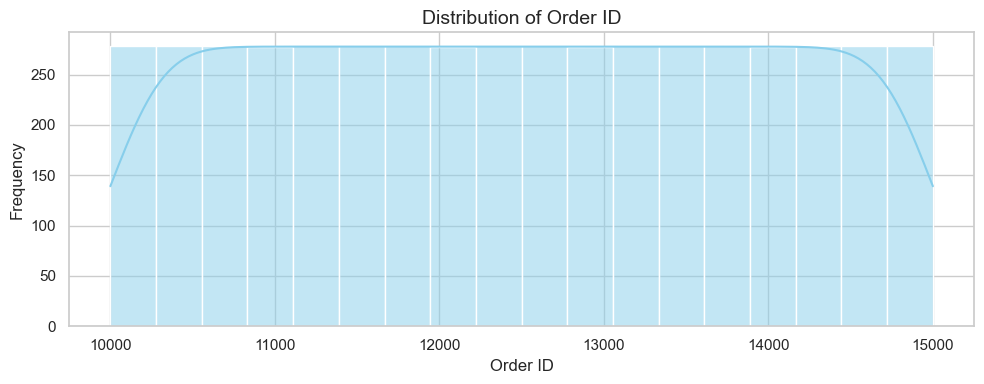

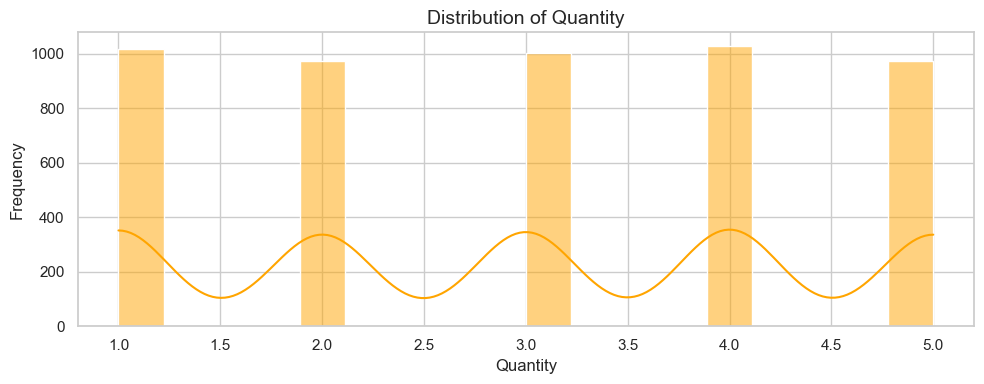

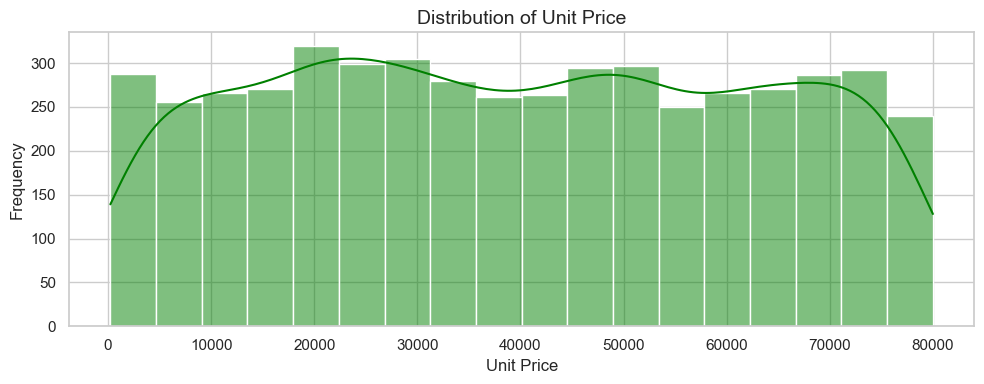

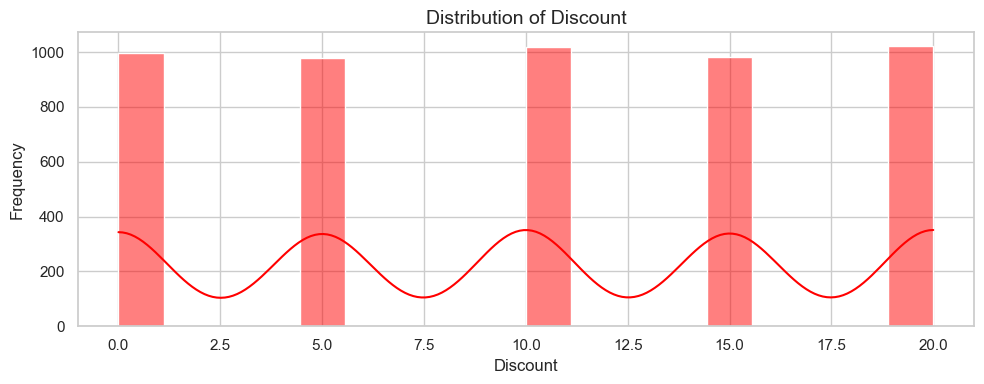

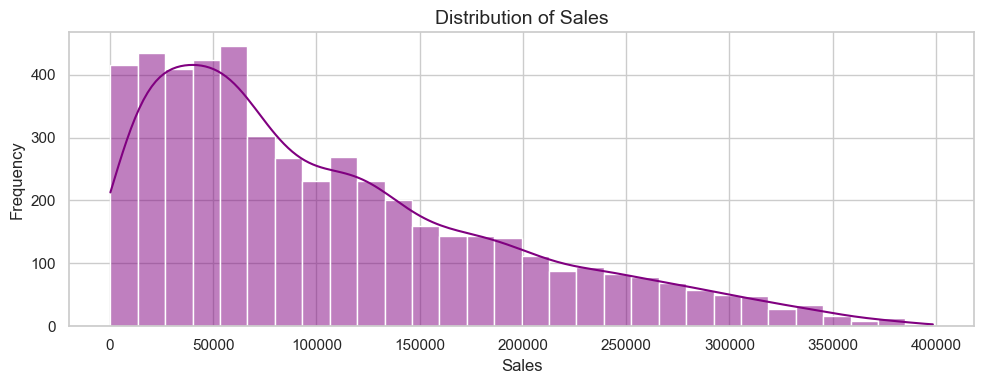

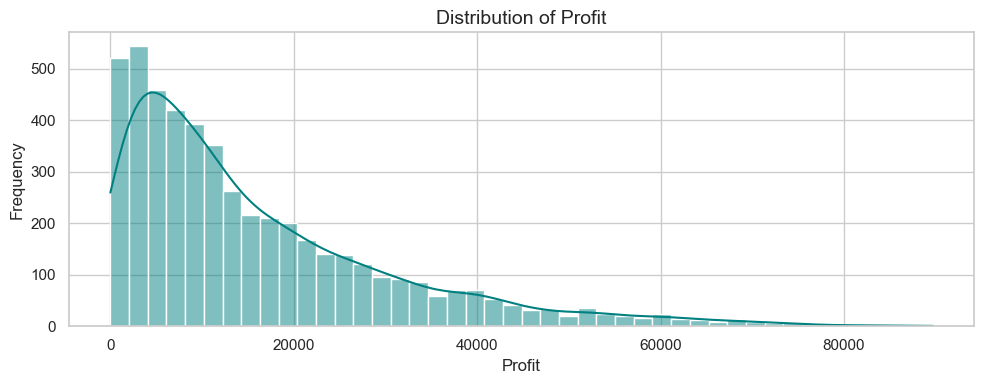

In [16]:

# List of numeric columns to plot
numeric_cols = ['Order ID', 'Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit']
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'teal']

# Set plot style
sns.set(style='whitegrid')

# Loop through each variable and plot vertically
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(10, 4))
    sns.histplot(data=Data, x=col, kde=True, color=colors[i])
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

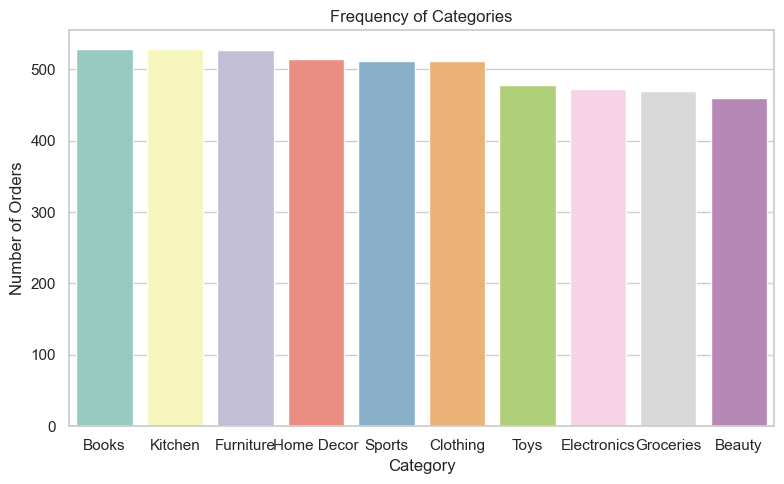

In [19]:
# Count categories
category_counts = Data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', 
            y='Count', 
            hue='Category', 
            data=category_counts, 
            palette='Set3', 
            dodge=False)

plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.legend([],[], frameon=False)  # hides legend if you don’t want it
plt.tight_layout()
plt.show()


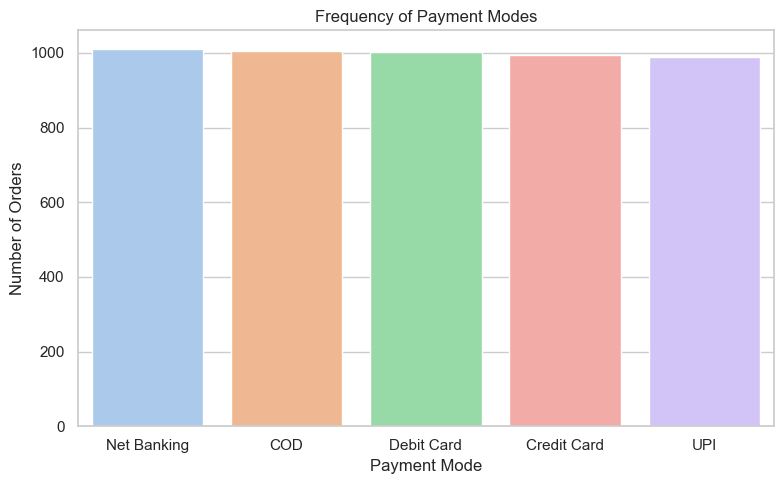

In [22]:
# Count frequency of each Payment Mode
payment_counts = Data['Payment Mode'].value_counts().reset_index()
payment_counts.columns = ['Payment Mode', 'Count']

# Plot with hue
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment Mode', 
            y='Count', 
            hue='Payment Mode', 
            data=payment_counts, 
            palette='pastel', 
            dodge=False)

plt.title('Frequency of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.legend([], [], frameon=False)  # hide legend if not needed
plt.tight_layout()
plt.show()


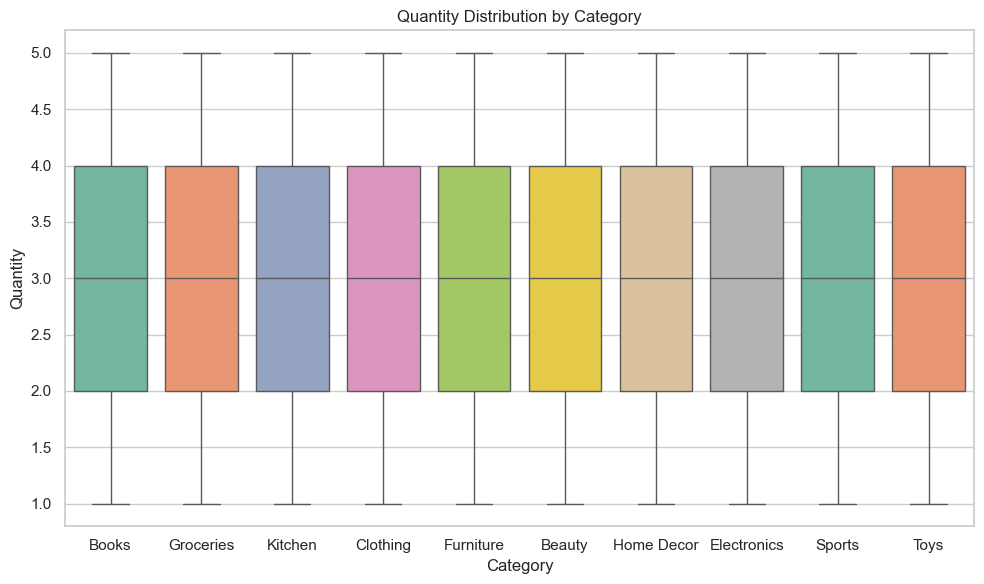

In [24]:
# Prepare data
plt.figure(figsize=(10, 6))

# Boxplot with hue
sns.boxplot(data=Data, x='Category', y='Quantity', hue='Category', 
            palette='Set2', dodge=False)

plt.title('Quantity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.legend([], [], frameon=False)  # hide legend if not needed
plt.tight_layout()
plt.show()


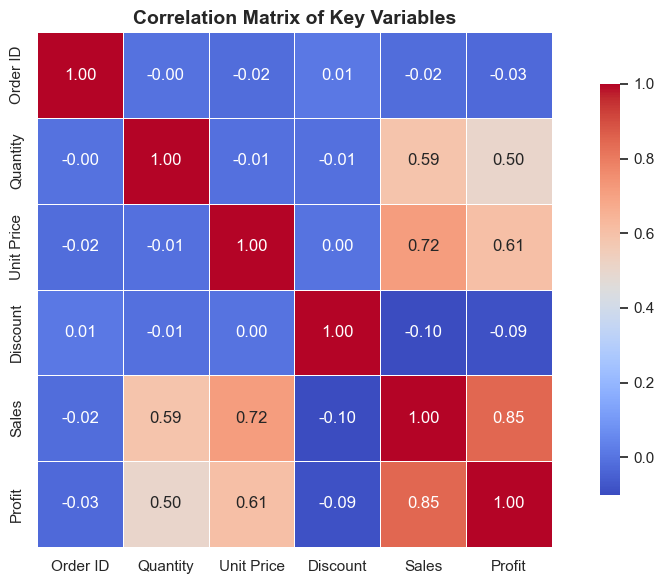

In [26]:
# Select relevant numeric columns
corr_columns = ['Order ID', 'Quantity', 'Unit Price', 'Discount', 'Sales', 'Profit']
corr_matrix = Data[corr_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, cbar_kws={'shrink': 0.8}, square=True)

plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
